# 07. Model Training

### Importando as bibliotecas

In [2]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts
import joblib
from sklearn.preprocessing import (RobustScaler)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline # Usando o pipeline do imblearn pois esse é um dataset desbalanceado
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

### Lendo o dataset tratado e visualizando o overview atual

In [4]:
df = pd.read_csv(consts.DATASET_LEAN) # Armazenando o dataset tratado em uma variável

In [5]:
df # Exbindo uma visão geral do dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [8]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Definindo os valores de x e y para o modelo de classificação definido

In [10]:
x = df.drop('Class', axis=1) # Definindo os valores de x para o modelo, separando a variável target do dataset
y = df['Class'] # Definindo os valores de y para o modelo, deixando o dataset somente com a variável target

In [11]:
x.head(3) # Visualizando os dados de x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [12]:
y.head(3) # Visualizando os dados de y

0    0
1    0
2    0
Name: Class, dtype: int64

### Listando as variáveis numéricas e categóricas de x

In [13]:
numerical_features = x.select_dtypes(include='number').columns # Armazenando as features numéricas em uma variável
categorical_features = x.select_dtypes(exclude='number').columns # Armazenando as features categóricas em uma variável

print('- Numerical Features:') # Printando as variávei numéricas
for feature in numerical_features:
    print(feature)

print('\n- Categorical Features:') # Printando as variávei categóricas
for feature in categorical_features:
    print(feature)

- Numerical Features:
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount

- Categorical Features:


### Visualizando a distribuição das features de x em histogramas

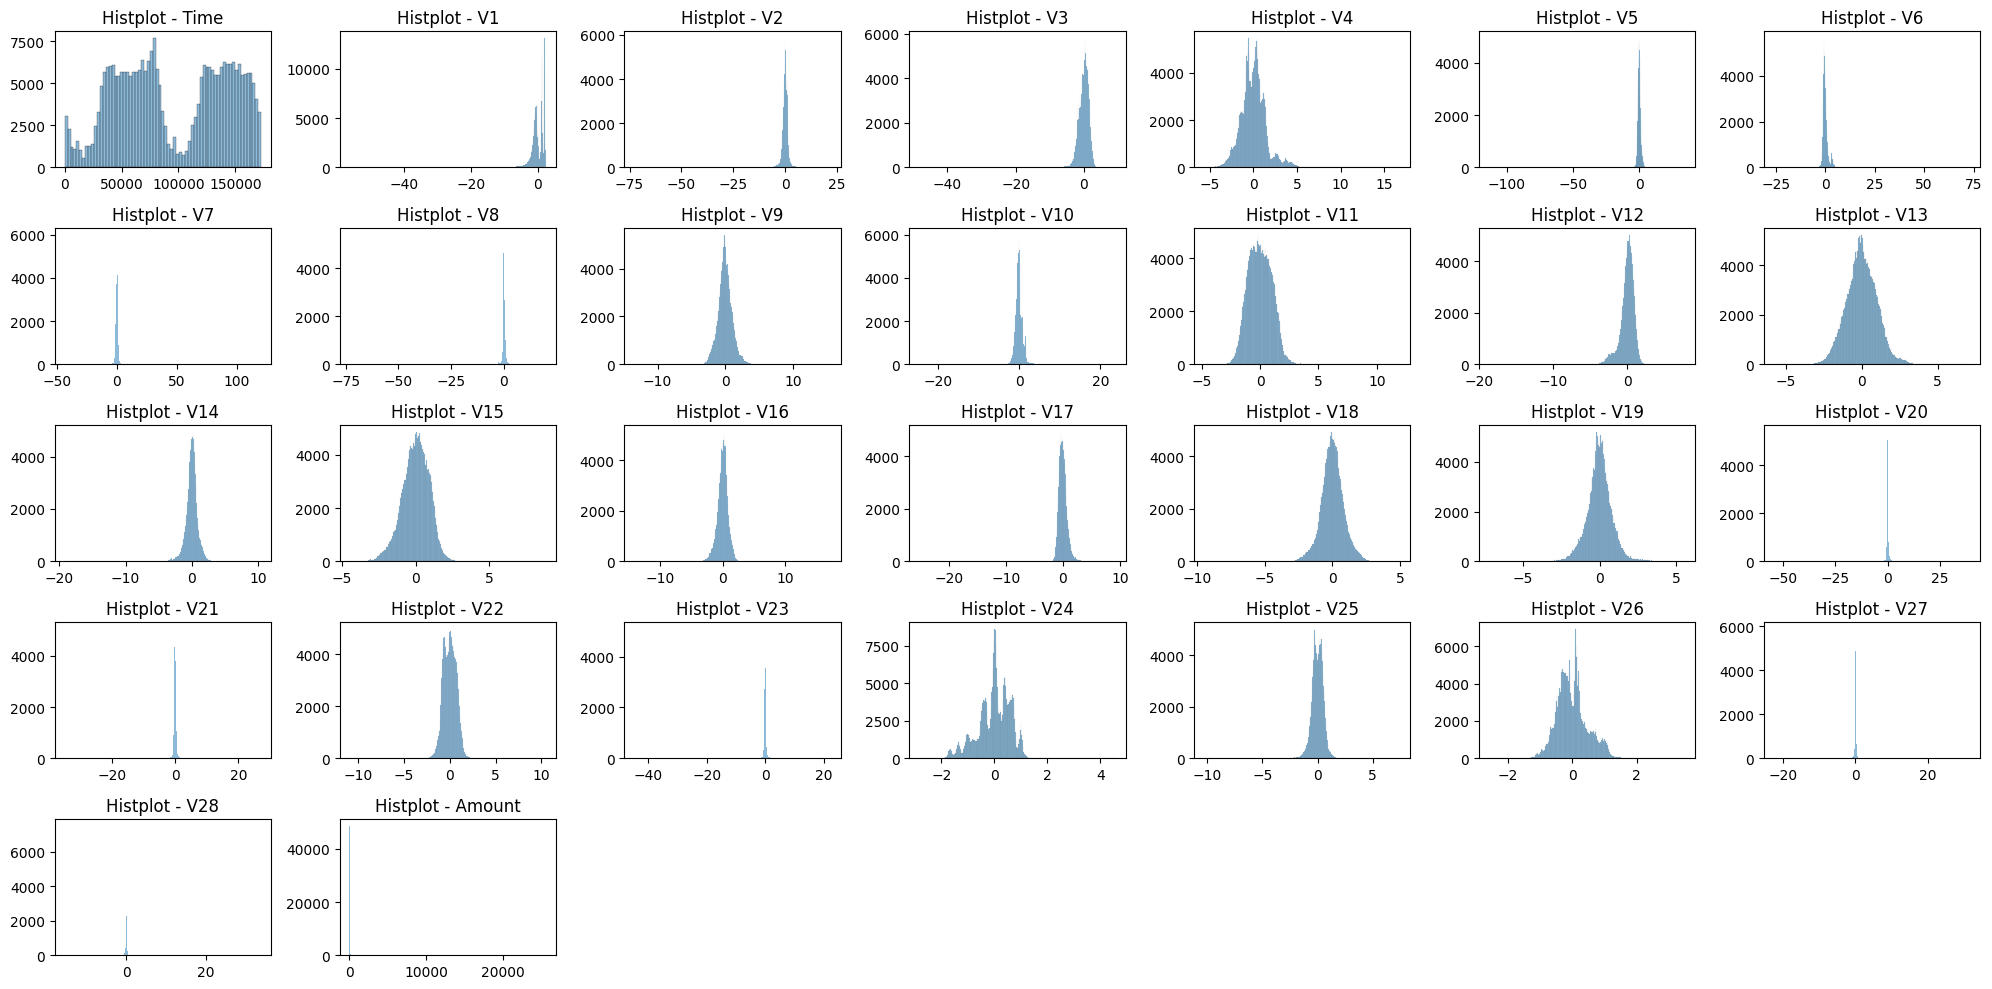

In [14]:
fn_charts.histplots(x, numerical_features, num_cols=7, height_figsize=2) # Criando os histplots para ver sua distribuição

### Definindo por qual procedimento cada feature de x vai passar

In [15]:
na_cols = df.columns[df.columns.str.startswith('V')] # Definindo as colunas que não precisam passar por pré processamentos

robust_cols = [ # Definindo as colunas que vão passar por Robust Scaler
    'Time', # Coluna com muitos outliers
    'Amount', # Coluna com muitos outliers
]

### Estabelecendo os pré processamentos que serão aplicados nas features antes da otimização de hiperparâmetros

In [19]:
preprocessing_initial = ColumnTransformer( # Estabelecendo os pré processamentos que serão aplicados nas features
    [ # Passando a inicial do novo nome da coluna, o pré processamento que será aplicado e a lista de colunas para pré processamento
        ('robust_scaler', RobustScaler(), robust_cols),
    ], remainder='passthrough', # Definindo o que acontece com as demais colunas, no caso não acontece nada ao invés de excluí-las
    force_int_remainder_cols=False, # Ajustando o formato dos número devido a futuras atualizações do Scikit-Learning
)

### Criando o pipeline para o modelo antes da otimização de hiperparâmetros

In [20]:
pipeline_initial = Pipeline( # Criando o pipeline para o modelo (Pipeline do Imblearn para tratar o desbalanceamento do dataset)
    [ # Passando as etapas do pipeline
        ('pre_processing', preprocessing_initial), # Fazendo o pré processamento conforme as definições anteriores
        ('resampling', RandomUnderSampler(random_state=consts.RANDOM_STATE)), # Tratando o dataset desbalanceado com Random Under Sampler (RUS)
        ('models', LogisticRegression(random_state=consts.RANDOM_STATE)), # Aplicando o modelo
    ]
)

### Treinando o modelo com os datasets x e y antes da otimização de hiperparâmetros

In [21]:
pipeline_initial.fit(x, y) # Fazendo o fit do pipeline com o x e o y

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('models', LogisticRegression(random_state=42))])

### Fazendo o Cross Validate antes da otimização de hiperparâmetros

In [26]:
scores_initial = cross_validate( # Fazendo a validação cruzada para testar diversas combinações de separação entre dados de treino e teste
    pipeline_initial, # Passando o pipeline definido acima
    x, # Definindo o dataset x
    y, # Definindo o dataset y
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=consts.RANDOM_STATE), # Aplicando o StratifiedKFold por ser um dataset desbalanceado
    scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision'], # Definindo as métricas de avaliação do modelo
    n_jobs=-2, # Definindo para usar toda a capacidade de processamento do computador e deixar um processador livre para não travar
)

### Criando um dataset com as métricas de avaliação do modelo antes da otimização de hiperparâmetros

In [27]:
scores_initial['time'] = scores_initial['fit_time'] + scores_initial['score_time'] # Criando a coluna de tempo somando fit_time e score_time
scores_initial['results'] = 'initial' # Criando uma coluna para separar os resultados iniciais e finais

df_results_initial = pd.DataFrame(scores_initial) # Criando um df transposto com os resultados dos modelos

df_results_initial # Exibindo o dataset com os resultados iniciais

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,results
0,1.806670,0.236090,0.967364,0.046392,0.909091,0.984004,0.715734,2.042760,initial
1,1.826714,0.249966,0.969664,0.051240,0.939394,0.979844,0.752000,2.076680,initial
2,1.842982,0.218583,0.975141,0.060667,0.928571,0.981973,0.742282,2.061565,initial
3,1.812680,0.246888,0.963642,0.041802,0.918367,0.965519,0.716749,2.059567,initial
4,1.801144,0.243621,0.967258,0.044353,0.877551,0.973754,0.717364,2.044766,initial


### Visualizando as métricas de avaliação do modelo antes da otimização de hiperparâmetros

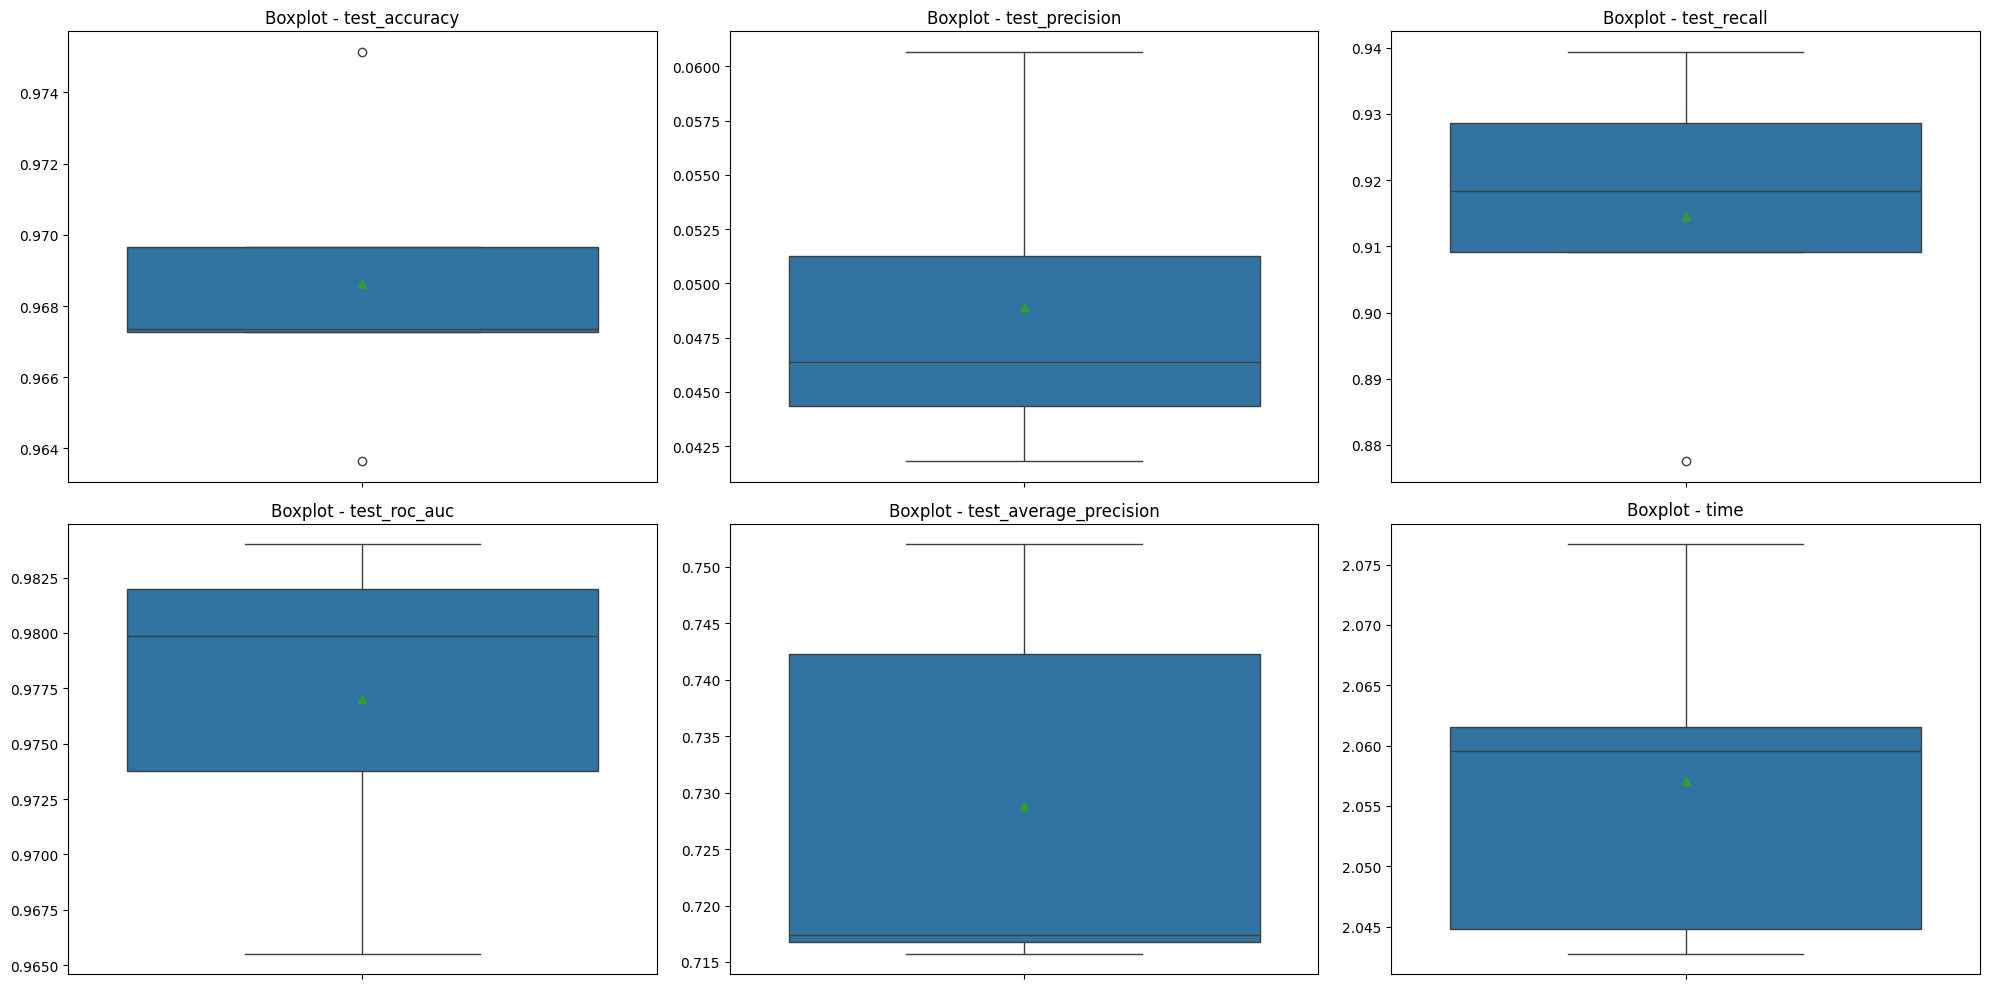

In [28]:
fn_charts.boxplots(df_results_initial, df_results_initial.columns[2:-1].to_list()) # Criando os boxplots para avaliação dos modelos

### Definindo as combinações de parâmetros que serão testados nas etapas do pipeline

In [32]:
params_grid_search = { # Definindo as combinações de parâmetros das etapas do pipeline serão testados (padrão: nome_etapa__parametro)
    'models__C': np.logspace(-3, 3, 7),
    'models__solver': ['liblinear', 'lbfgs', 'saga'],
    'models__penalty': ['l1', 'l2', 'elasticnet', 'none'],
}

### Definindo os parâmetros do Grid Search

In [33]:
grid_search = GridSearchCV( # Aplicando o Grid Search
    pipeline_initial, # Definindo o pipeline
    params_grid_search, # Definindo as variações dos parâmetros que serão avaliados
    scoring=['roc_auc', 'average_precision', 'accuracy'], # Definindo as métricas que serão avaliadas
    n_jobs=-2, # Definindo para usar toda a capacidade de processamento do computador e deixar um processador livre para não travar
    refit='average_precision' # Definindo a métrica principal dentre as métricas avaliadas
)

### Treinando o modelo com a otimização de hiperparâmetros com o Grid Search

In [34]:
import warnings # Importando a biblioteca de warnings

warnings.filterwarnings('ignore') # Ignorando os avisos apenas pois há combinações de parâmetros que não podem ser feitas, retornando null

grid_search.fit(x, y) # Fazendo o fit do Grid Search com x e y

GridSearchCV(estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('robust_scaler',
                                                                         RobustScaler(),
                                                                         ['Time',
                                                                          'Amount'])])),
                                       ('resampling',
                                        RandomUnderSampler(random_state=42)),
                                       ('models',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-2,
             param_grid={'models__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'models__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'models__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

### Visualizando os melhores parâmetros encontrados pelo Grid Search

In [35]:
grid_search.best_params_ # Visualizando os melhores parâmetros encontrados pelo Grid Search

{'models__C': 0.001, 'models__penalty': 'l2', 'models__solver': 'liblinear'}

### Estabelecendo os pré processamentos que serão aplicados nas features com os melhores parâmetros encontrados pelo Grid Search

In [36]:
preprocessing_final = ColumnTransformer( # Estabelecendo os pré processamentos que serão aplicados nas features
    [ # Passando a inicial do novo nome da coluna, o pré processamento que será aplicado e a lista de colunas para pré processamento
        ('robust_scaler', RobustScaler(), robust_cols),
    ], remainder='passthrough', # Definindo o que acontece com as demais colunas, no caso não acontece nada ao invés de excluí-las
    force_int_remainder_cols=False, # Ajustando o formato dos número devido a futuras atualizações do Scikit-Learning
)

### Treinando o modelo com os melhores parâmetros encontrados pelo Grid Search

In [37]:
pipeline_final = Pipeline( # Criando o pipeline para o modelo (Pipeline do Imblearn para tratar o desbalanceamento do dataset)
    [ # Passando as etapas do pipeline
        ('pre_processing', preprocessing_final), # Fazendo o pré processamento conforme as definições anteriores
        ('resampling', RandomUnderSampler(random_state=consts.RANDOM_STATE)), # Tratando o dataset desbalanceado com Random Under Sampler (RUS)
        ('models', LogisticRegression(
            random_state=consts.RANDOM_STATE,
            C=grid_search.best_params_['models__C'],
            penalty=grid_search.best_params_['models__penalty'],
            solver=grid_search.best_params_['models__solver'],
        )), # Aplicando o modelo
    ]
)

### Treinando o modelo com os datasets x e y após a otimização de hiperparâmetros

In [38]:
pipeline_final.fit(x, y) # Fazendo o fit do pipeline com o x e o y

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  ['Time', 'Amount'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('models',
                 LogisticRegression(C=0.001, random_state=42,
                                    solver='liblinear'))])

### Fazendo o Cross Validate com os melhores parâmetros encontrados pelo Grid Search

In [40]:
scores_final = cross_validate( # Fazendo a validação cruzada para testar diversas combinações de separação entre dados de treino e teste
    pipeline_final, # Passando o pipeline definido acima
    x, # Definindo o dataset x
    y, # Definindo o dataset y
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=consts.RANDOM_STATE), # Aplicando o StratifiedKFold por ser um dataset desbalanceado
    scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision'], # Definindo as métricas de avaliação do modelo
    n_jobs=-2, # Definindo para usar toda a capacidade de processamento do computador e deixar um processador livre para não travar
)

### Criando um dataset com as métricas de avaliação do modelo com os melhores parâmetros encontrados pelo Grid Search

In [41]:
scores_final['time'] = scores_final['fit_time'] + scores_final['score_time'] # Criando a coluna de tempo somando fit_time e score_time
scores_final['results'] = 'final' # Criando uma coluna para separar os resultados iniciais e finais

df_results_final = pd.DataFrame(scores_final) # Criando um df transposto com os resultados dos modelos

df_results_final # Exibindo o dataset com os resultados finais

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,results
0,0.429936,0.197885,0.884800,0.013987,0.939394,0.969976,0.694480,0.627821,final
1,0.432032,0.185268,0.859081,0.011702,0.959596,0.980891,0.762727,0.617300,final
2,0.437585,0.192230,0.866400,0.011954,0.938776,0.964315,0.756418,0.629815,final
3,0.435012,0.211352,0.860870,0.011728,0.959184,0.969847,0.773308,0.646363,final
4,0.432032,0.184271,0.875476,0.012544,0.918367,0.958123,0.736002,0.616302,final


### Visualizando as métricas de avaliação do modelo com os melhores parâmetros encontrados pelo Grid Search

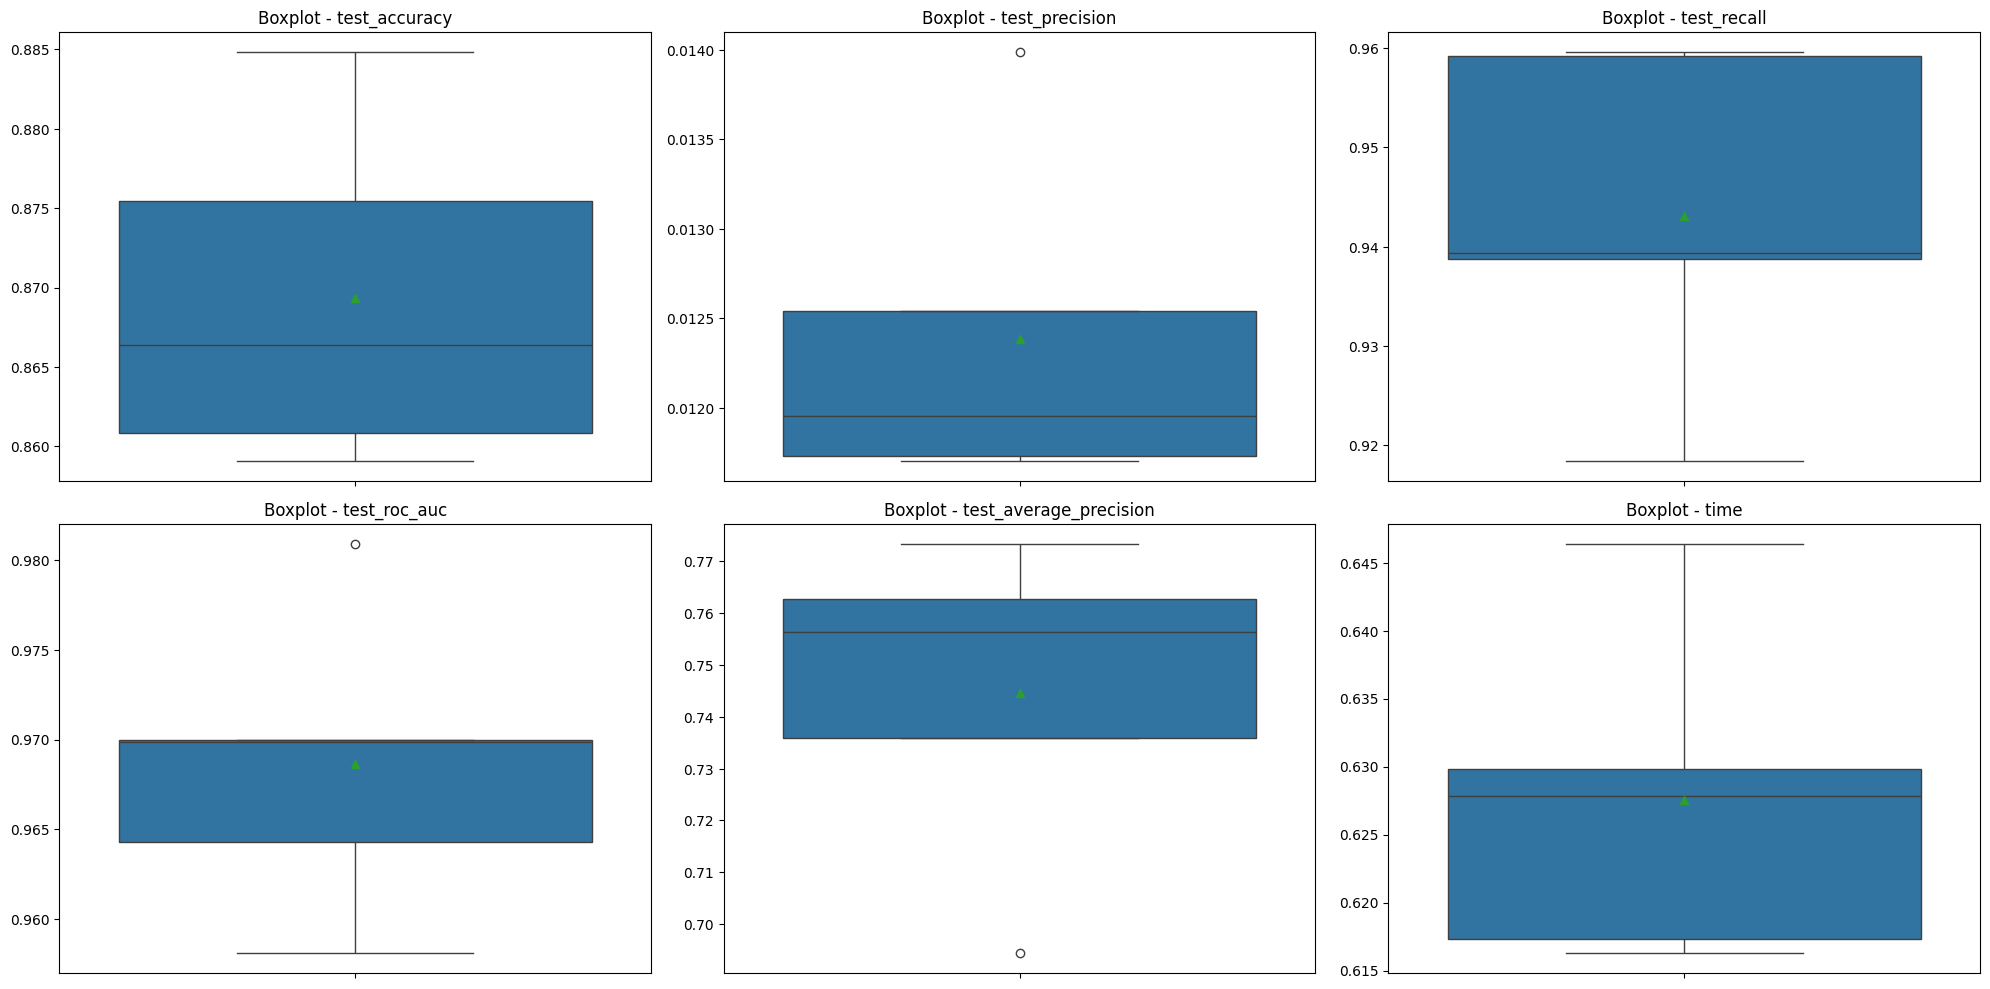

In [42]:
fn_charts.boxplots(df_results_final, df_results_final.columns[2:-1].to_list()) # Criando os boxplots para avaliação dos modelos

### Concatenando os dois datasets de resultados antes e depois para comparar as melhorias da otimização de hiperparâmetros

In [43]:
df_combined = pd.concat([df_results_final, df_results_initial], ignore_index=True) # Concatenando os dois datasets de antes e depois

df_combined # Exibindo o dataset concatenado

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time,results
0,0.429936,0.197885,0.884800,0.013987,0.939394,0.969976,0.694480,0.627821,final
1,0.432032,0.185268,0.859081,0.011702,0.959596,0.980891,0.762727,0.617300,final
2,0.437585,0.192230,0.866400,0.011954,0.938776,0.964315,0.756418,0.629815,final
3,0.435012,0.211352,0.860870,0.011728,0.959184,0.969847,0.773308,0.646363,final
4,0.432032,0.184271,0.875476,0.012544,0.918367,0.958123,0.736002,0.616302,final
5,1.806670,0.236090,0.967364,0.046392,0.909091,0.984004,0.715734,2.042760,initial
6,1.826714,0.249966,0.969664,0.051240,0.939394,0.979844,0.752000,2.076680,initial
7,1.842982,0.218583,0.975141,0.060667,0.928571,0.981973,0.742282,2.061565,initial
8,1.812680,0.246888,0.963642,0.041802,0.918367,0.965519,0.716749,2.059567,initial
9,1.801144,0.243621,0.967258,0.044353,0.877551,0.973754,0.717364,2.044766,initial


### Comparando os resultados de antes e depois da otimização de hiperparâmetros em boxplots

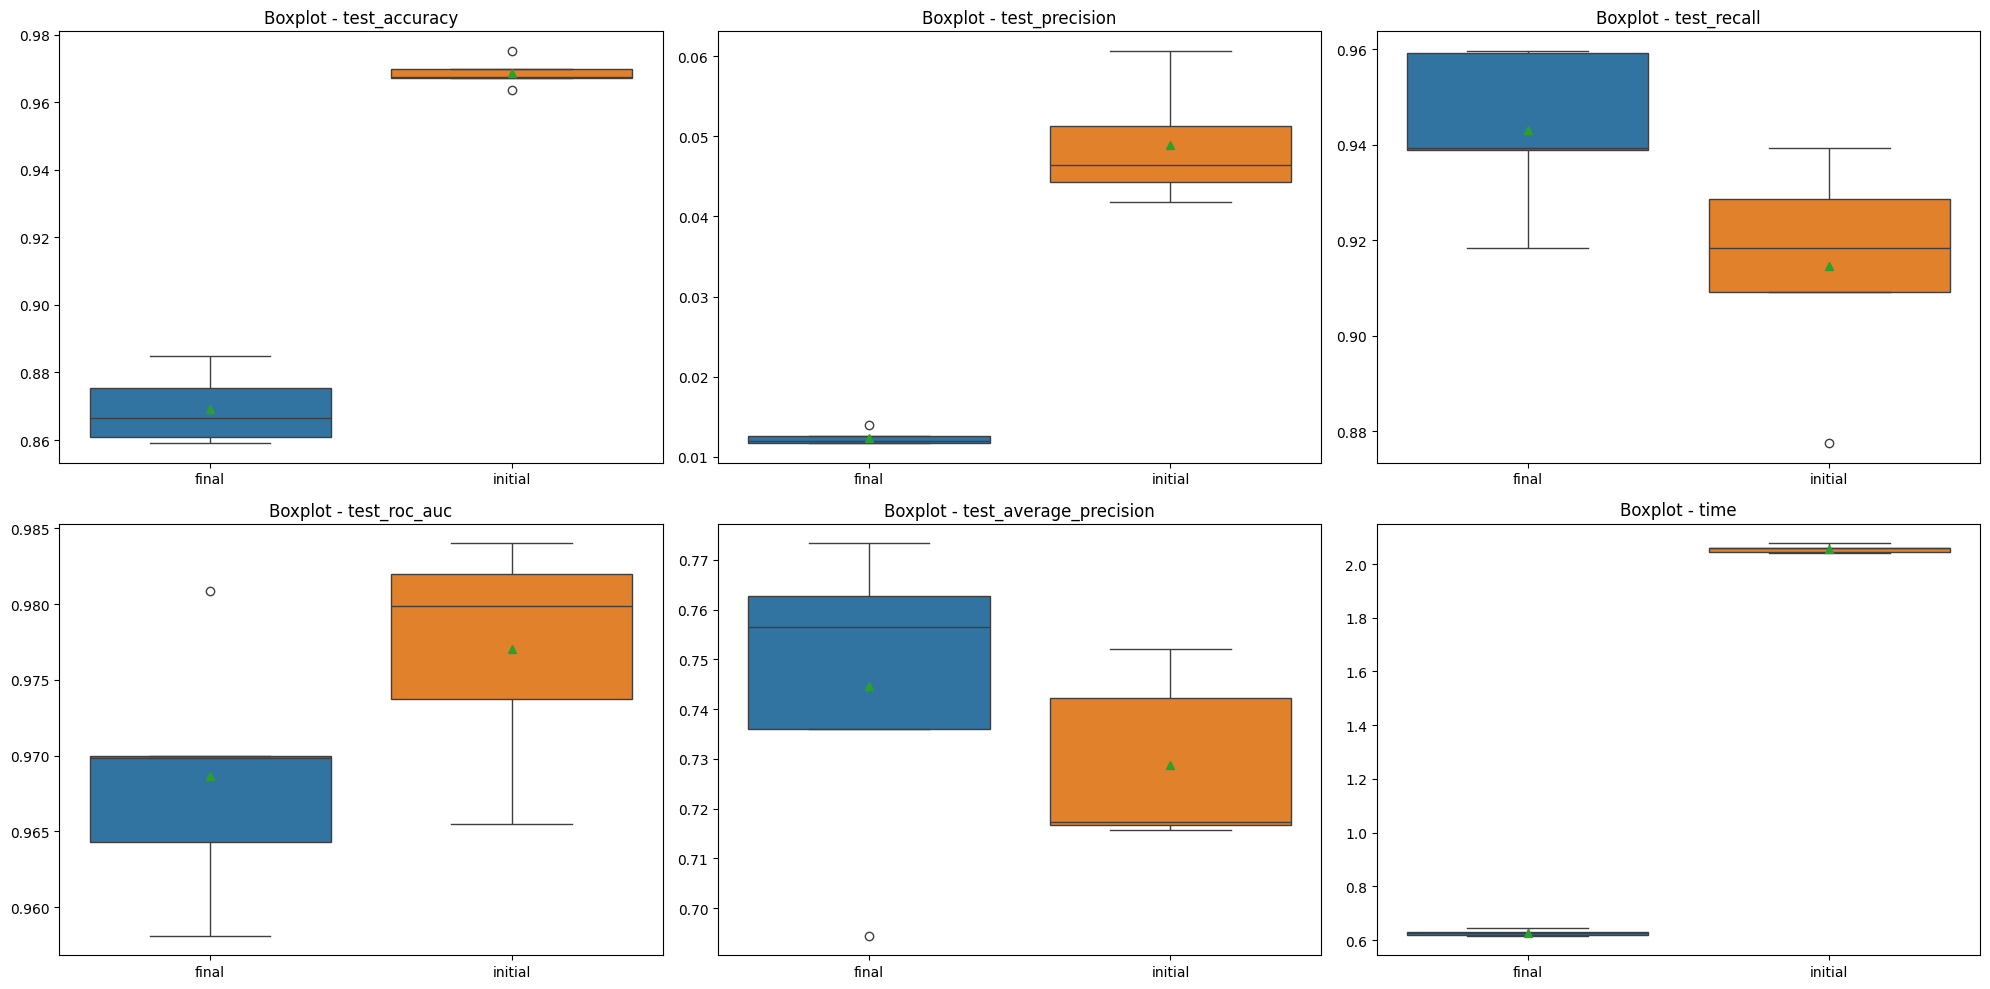

In [44]:
fn_charts.boxplots(df_combined, df_combined.columns[2:-1].to_list(), 'results') # Criando os boxplots para comparação dos modelos

### Persistindo (salvando) o modelo treinado com os melhores parâmetros encontrados pelo Grid Search

In [45]:
joblib.dump(pipeline_final, consts.MODEL_CLASSIFICATION_JOBLIB) # Persistindo o modelo no formato joblib
joblib.dump(pipeline_final, consts.MODEL_CLASSIFICATION_PKL) # Persistindo o modelo no formato pkl

['../models/model_classification.pkl']

### Comentando as técnicas usadas para evitar o overfitting do modelo

- **Balanceamento de Classes:** No aspecto de Balanceamento de Classes, como o dataset do projeto é desbalanceado, foi aplicado a técnica de Random Under Sampling (RUS) para se equiparar os valores da classe target ("Class"), onde se reduz a quantidade de valores da classe majoritária até que fique igual aos valores da classe minoritária
- **Validação Cruzada:** No aspecto de Validação Cruzada, foi aplicado o Stratified K-Fold, por ser um dataset desbalanceado, para dividir o conjunto de treinamento em várias partes (folds) e realizar o treinamento e validação do modelo em combinações diferentes desses folds, de modo que se obtém resultados mais confiáveis das métricas de avaliação do modelo e reduz o viés associado a uma única divisão do conjunto de treinamento
- **Regularização:** No aspecto de Regularização, foi aplicado a regularização L2 (Ridge) para adicionar uma penalidade ao modelo com base no coeficientes dos parâmetros, de modo que os coeficientes se tornem muito grandes e assim reduzindo o overfitting
- **Otimização de Hiperparâmetros:** No aspecto de Otimização de Hiperparâmetros, foi aplicado o Grid Search para se combinar os melhores parâmetros das etapas do pipeline, de modo que se obtenha os melhores resultados nas métricas de avaliação para ter um modelo com boa performance e evitar o overfitting

### Considerações Finais

Após a criação de um modelo com o melhor AUPRC e consequentemente o melhor Recall, conseguimos identificar mais fraudes dentre as transações que realmente são fraudes, dessa forma alcançando o objetivo do projeto. No entanto, para se identificar mais fraudes esse modelo vai consequentemente identificar transações que não são fraudes como fraudes, e isso vai gerar um custo para a empresa em, por exemplo, ter que aumentar a equipe que faz a confirmação das transações para ver se são realmente fraudes ou não. Uma solução para esse caso é, criar diferentes modelos para diferentes valores de transações, onde para transações de valores mais baixos se utilize um modelo que não acerte tantas fraudes assim (e consequentemente a equipe não precisará de um grande aumento, já que essas são a grande maioria das transações), já para transações de valores médios a altos se utilize um modelo que acerte um volume considerável de fraudes, e por fim para transações de valores altos e extremamente altos se utilize um modelo que acerte praticamente todas as fraudes, pois essas transações se forem realizadas causarão um grande prejuízo para a empresa e por serem bem menos frequentes não necessitam de uma equipe de confirmação de fraudes tão grande.